In [7]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from pyha import *
from pyha.cores import *
from pyha.cores.util import *
import scipy
from scipy import signal
import warnings
warnings.filterwarnings('ignore') # yolo!
import numpy as np
import inspect

# GitHub cannot display the Table of Contents!

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Info

In [9]:
print(inspect.getdoc(Spectrogram))
print('\n\nMain interface\n' + inspect.getdoc(Spectrogram.main))

Spectrogram
-----------

Combines a bunch of cores to build a spectrogram system.

Args:
    fft_size: see R2SDF
    avg_freq_axis: see BitreversalFFTshiftAVGPool
    avg_time_axis: see BitreversalFFTshiftAVGPool
    window_type: see Windower
    fft_twiddle_bits: see R2SDF
    window_bits: see Windower
    dc_removal_len: see DCRemoval


Main interface
Args:
    input (DataValid): -1.0 ... 1.0 range, up to 18 bits

Returns:
    DataValid: Result from the BitreversalFFTshiftAVGPool core


# Examples

## High power signal

INFO:sim:Tracing is enabled, running "MODEL" and "HARDWARE" simulations
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "HARDWARE" simulation...


100%|██████████| 294912/294912 [03:54<00:00, 1259.29it/s]


INFO:sim:Flushing the pipeline to collect 18432 valid samples (currently have 18304)
INFO:sim:Flush took 1191 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


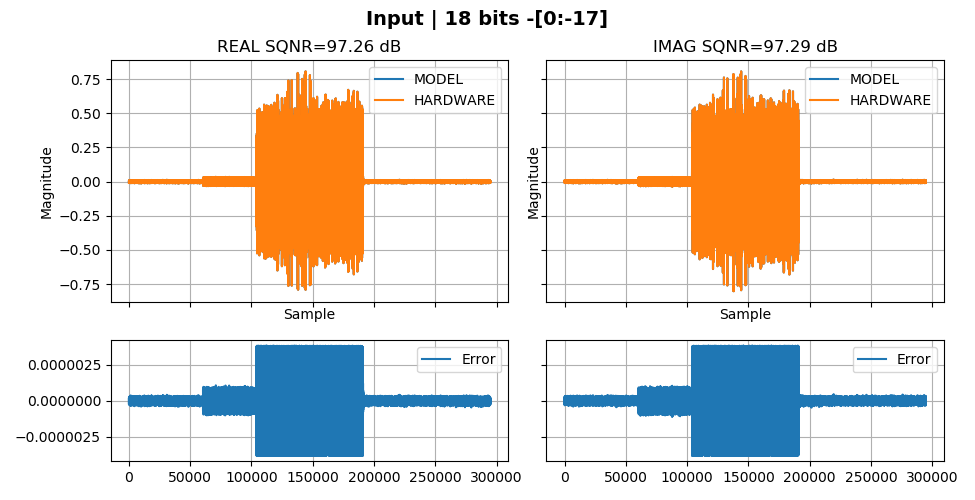

<IPython.core.display.Javascript object>


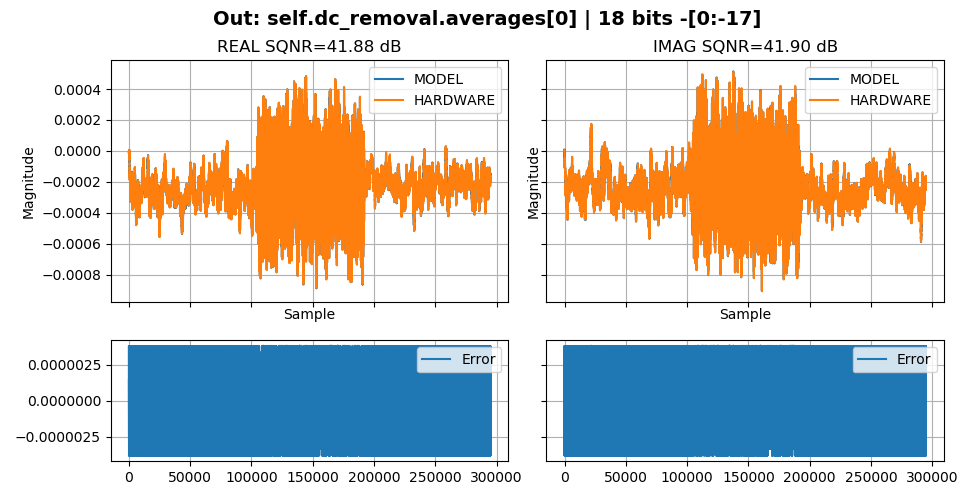

<IPython.core.display.Javascript object>


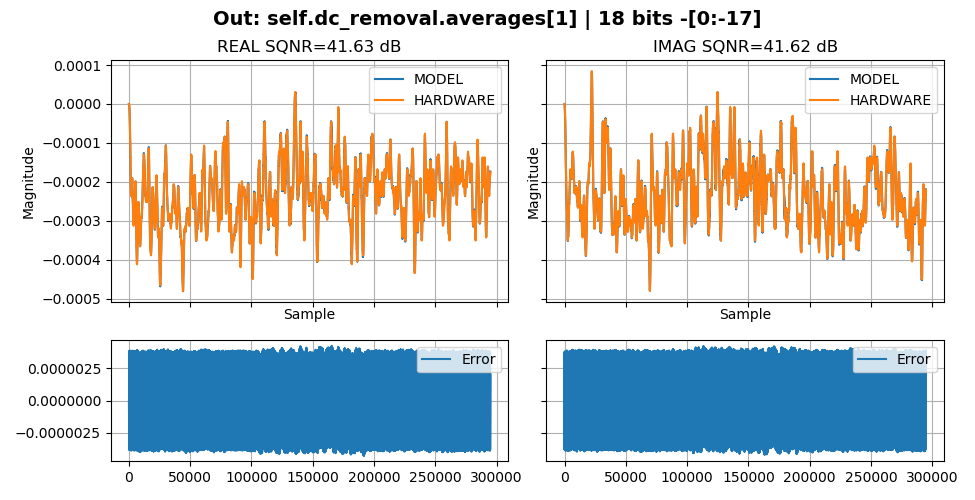

<IPython.core.display.Javascript object>


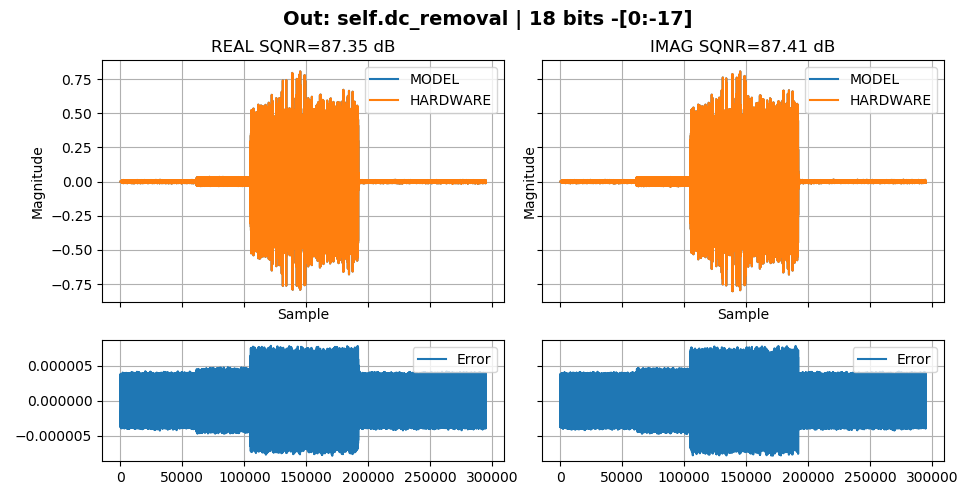

<IPython.core.display.Javascript object>


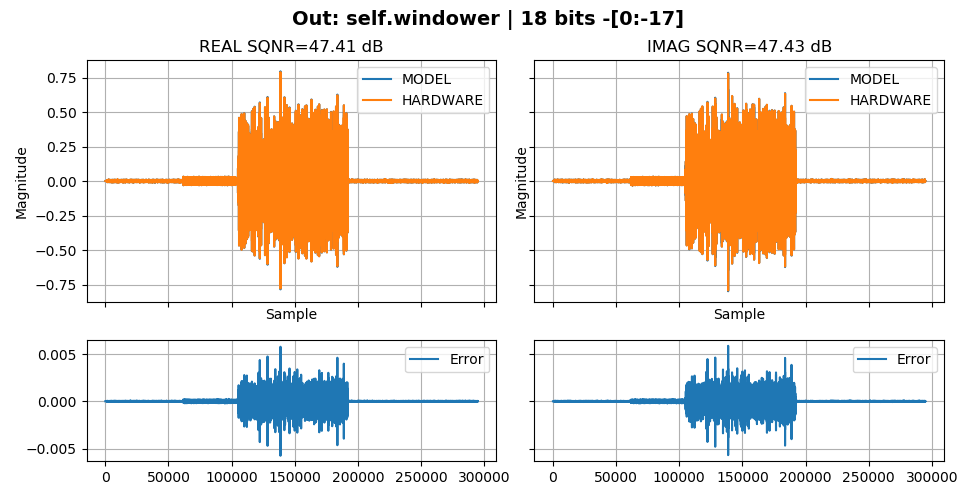

<IPython.core.display.Javascript object>


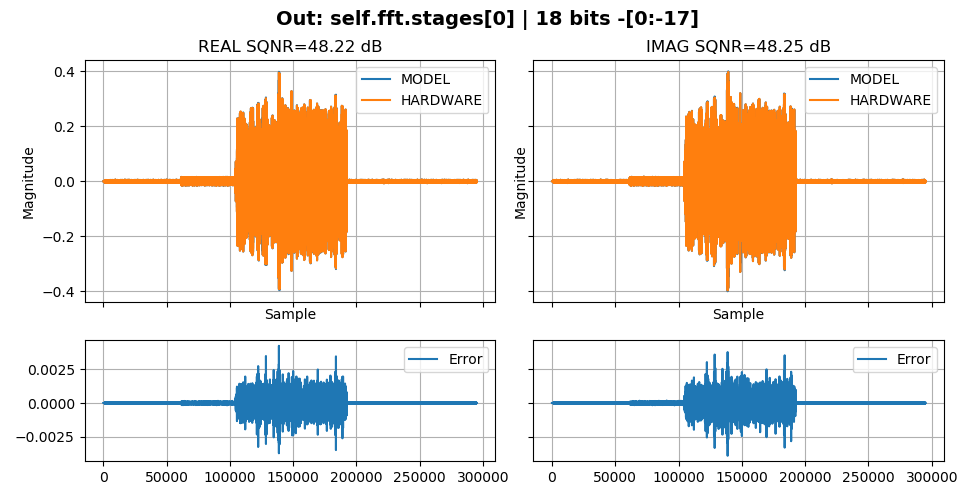

<IPython.core.display.Javascript object>


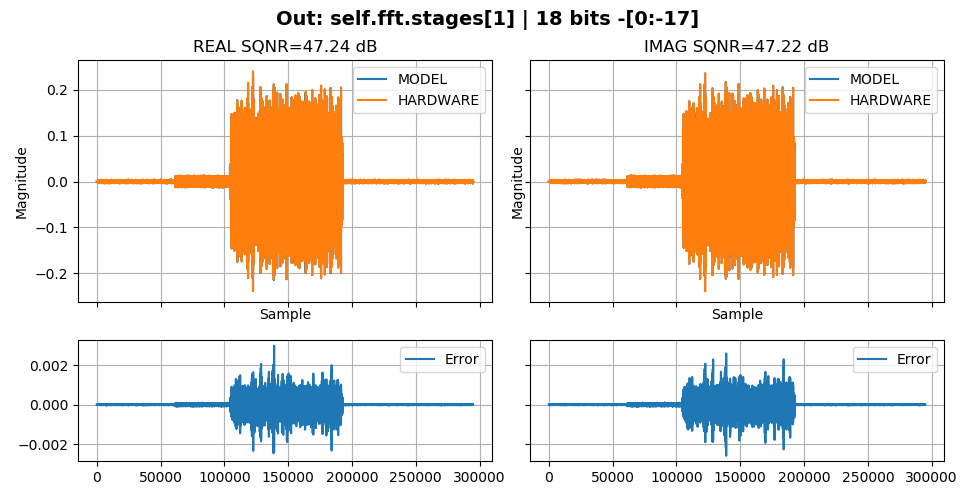

<IPython.core.display.Javascript object>


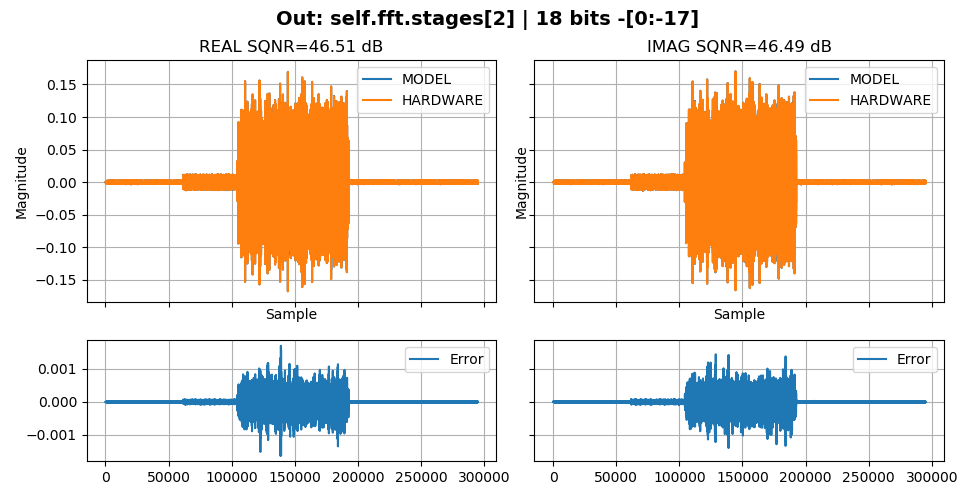

<IPython.core.display.Javascript object>


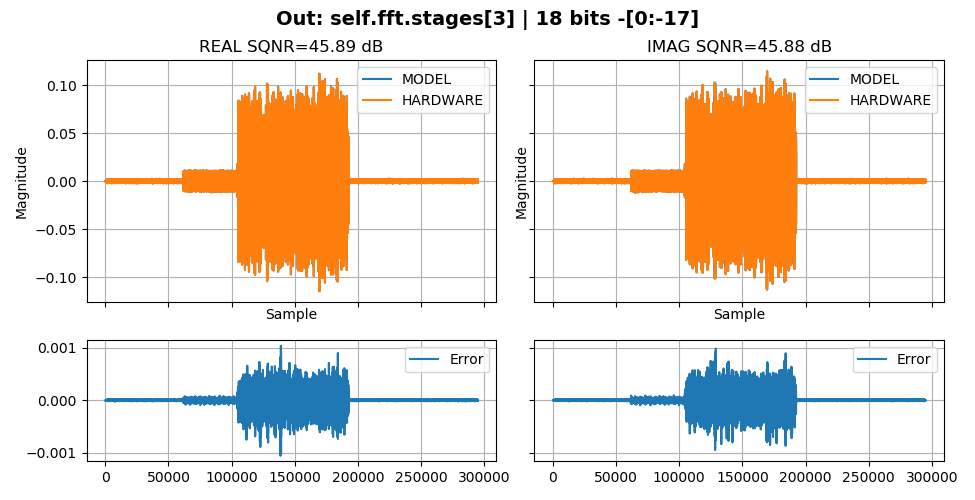

<IPython.core.display.Javascript object>


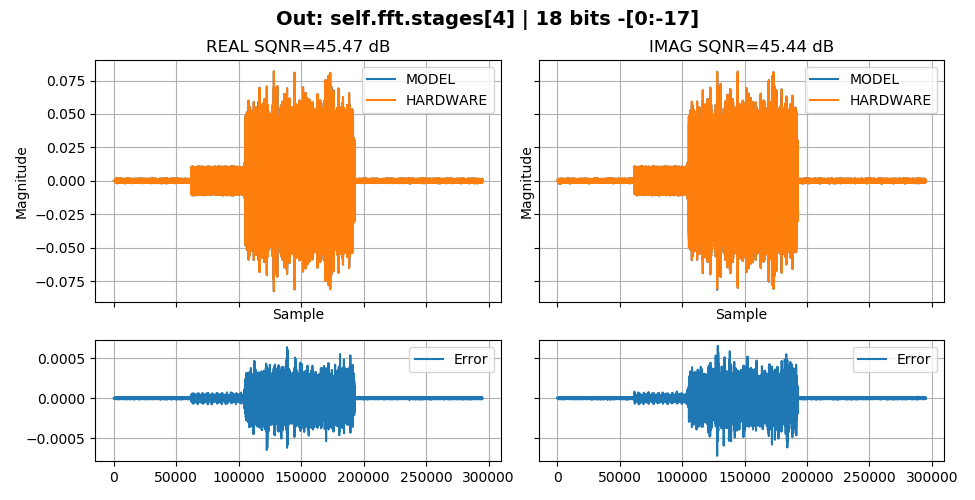

<IPython.core.display.Javascript object>


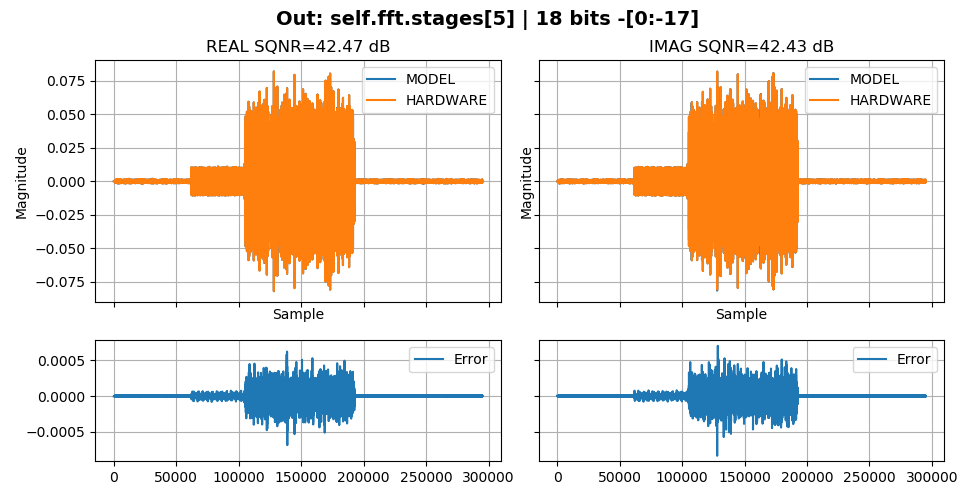

<IPython.core.display.Javascript object>


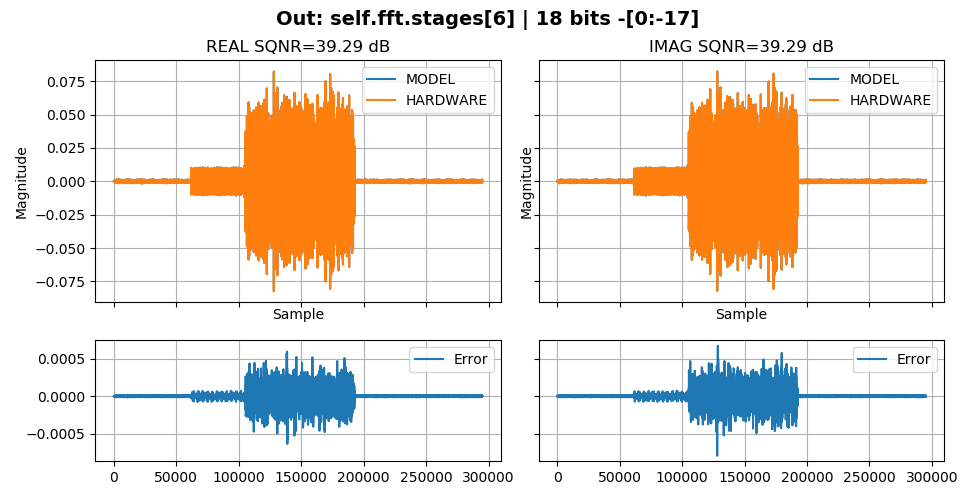

<IPython.core.display.Javascript object>


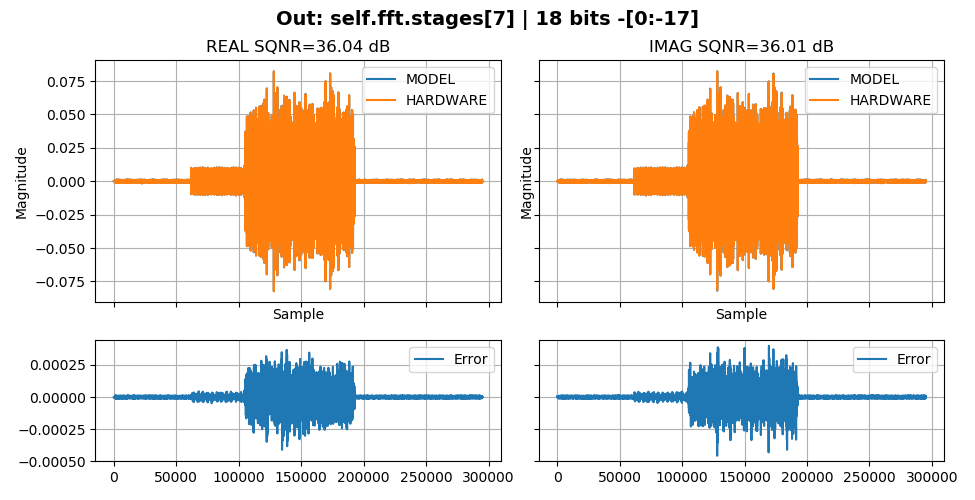

<IPython.core.display.Javascript object>


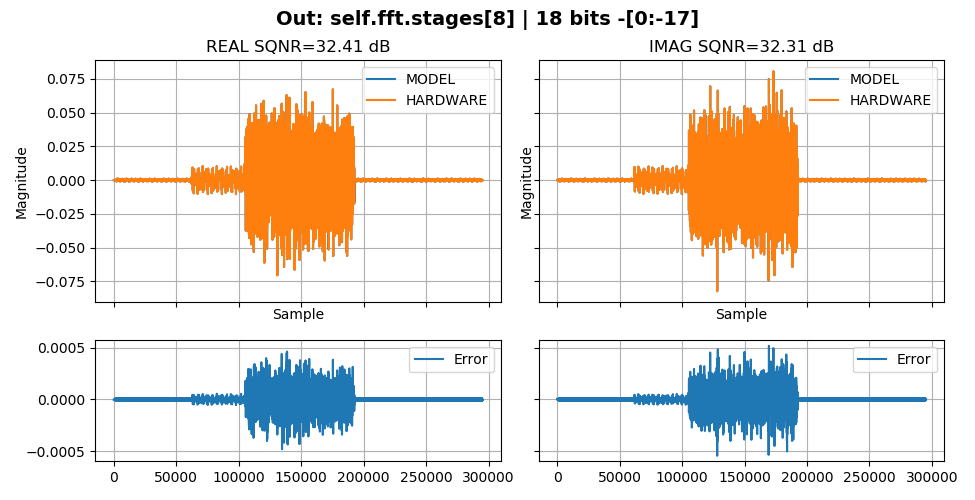

<IPython.core.display.Javascript object>


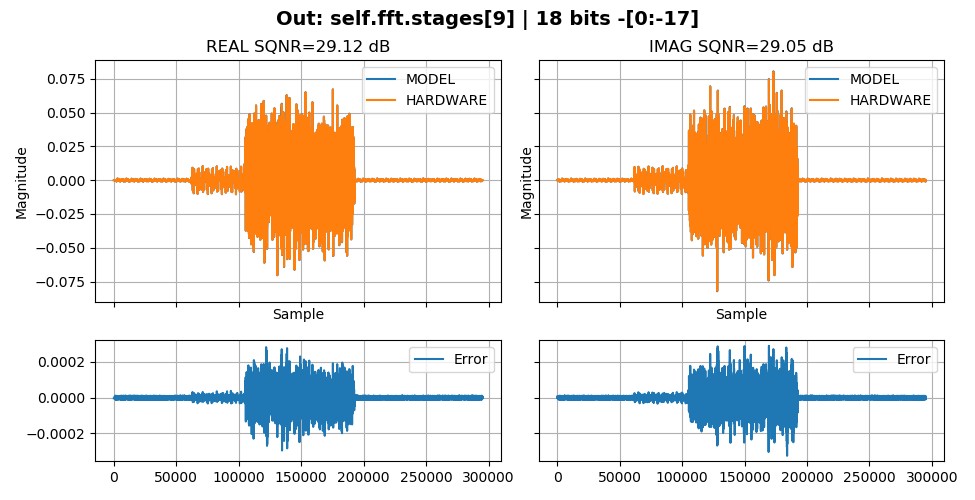

<IPython.core.display.Javascript object>


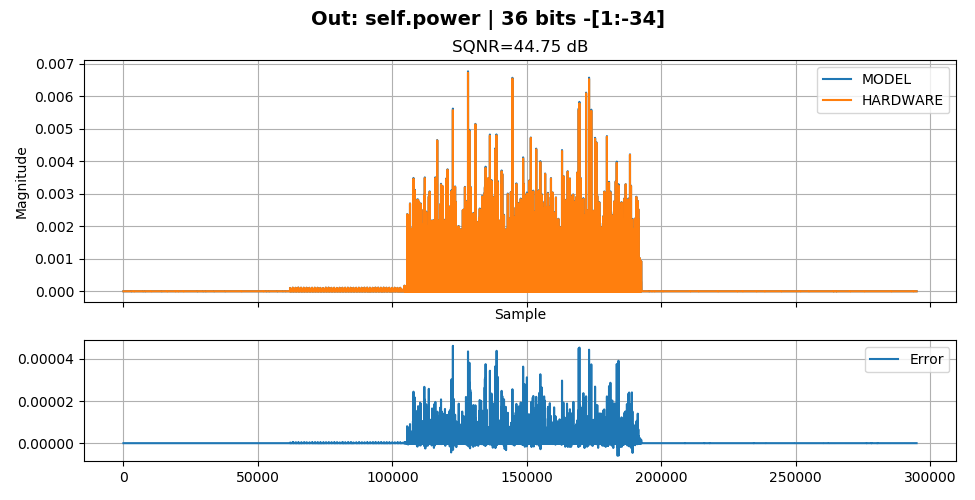

<IPython.core.display.Javascript object>


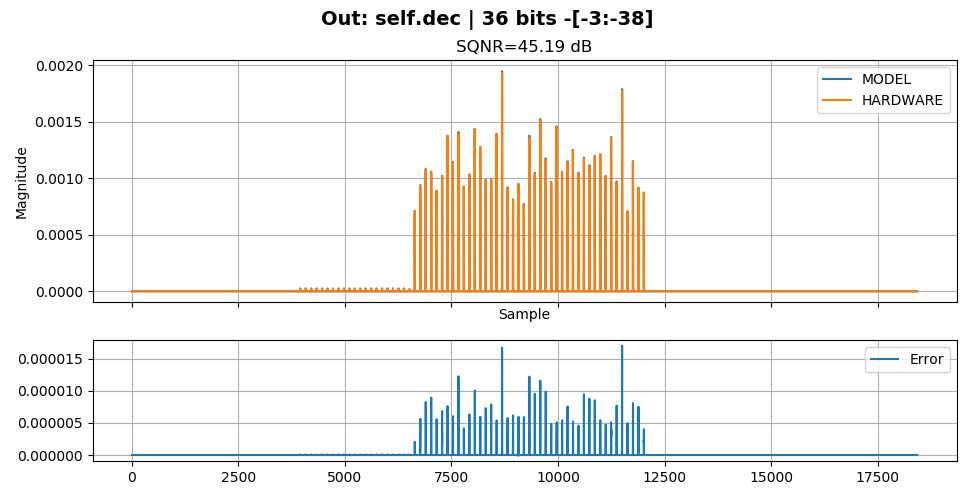

<IPython.core.display.Javascript object>


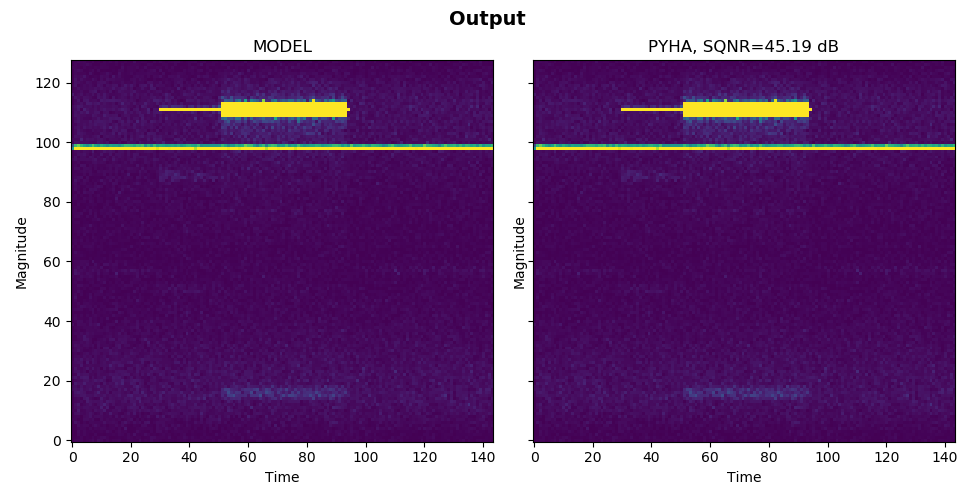

In [10]:
dut = Spectrogram(fft_size=1024, avg_freq_axis=8, avg_time_axis=2, fft_twiddle_bits=9, window_bits=8)
crop = dut.FFT_SIZE * dut.AVG_TIME_AXIS
input_signal = load_complex64_file(get_data_file('limem_ph3strong_40m'))
input_signal = input_signal[:len(input_signal) // (crop) * (crop)]

sims = simulate(dut, input_signal, trace=True, pipeline_flush='auto')
plot_trace()
plot_imshow(sims, name='Output', rows=dut.FFT_SIZE // dut.AVG_FREQ_AXIS, transpose=True)

## Low power signal

INFO:sim:Tracing is enabled, running "MODEL" and "HARDWARE" simulations
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "HARDWARE" simulation...


100%|██████████| 262144/262144 [03:32<00:00, 1231.49it/s]

INFO:sim:Flushing the pipeline to collect 16384 valid samples (currently have 16256)


INFO:sim:Flush took 1191 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


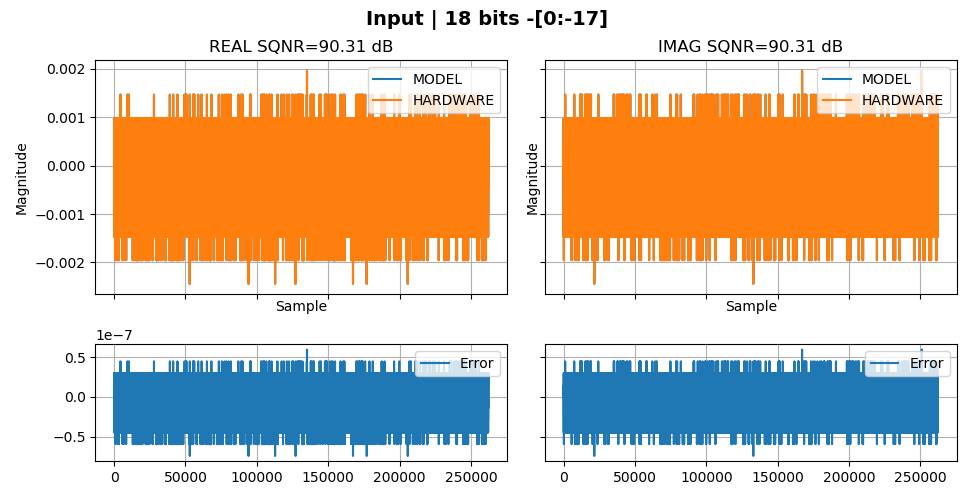

<IPython.core.display.Javascript object>


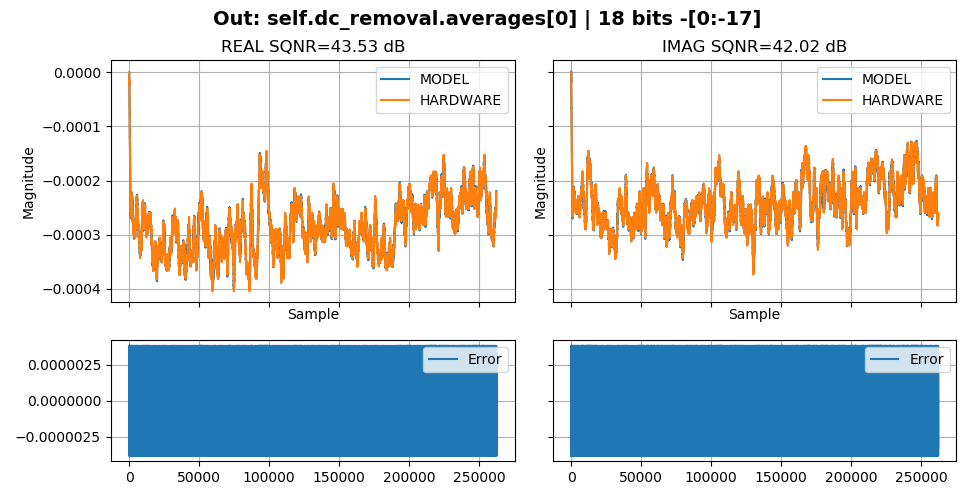

<IPython.core.display.Javascript object>


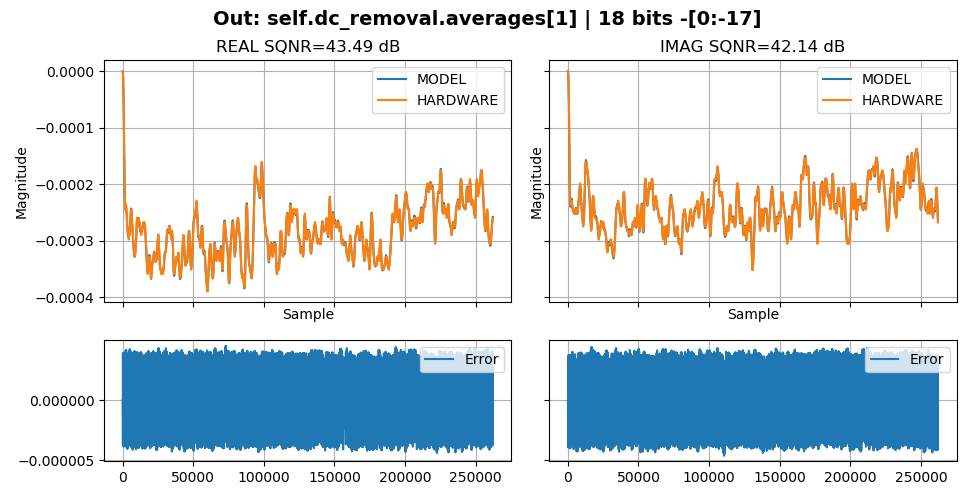

<IPython.core.display.Javascript object>


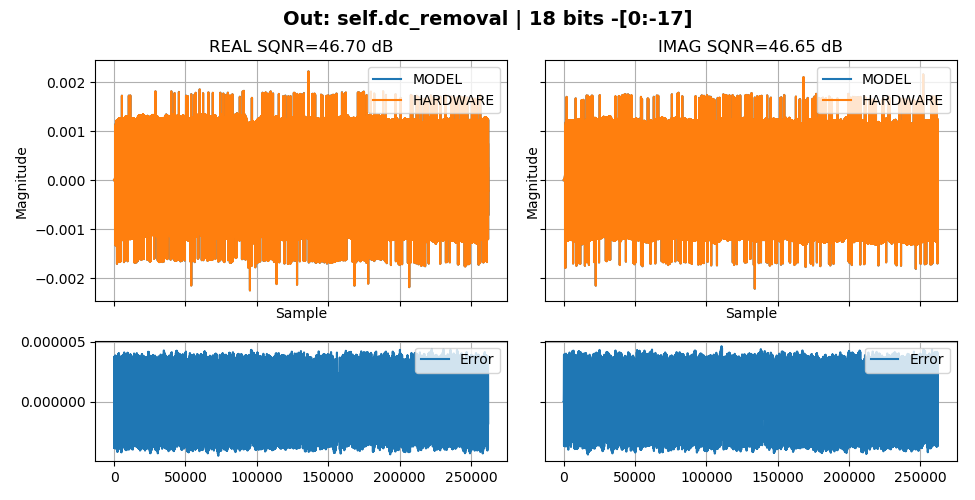

<IPython.core.display.Javascript object>


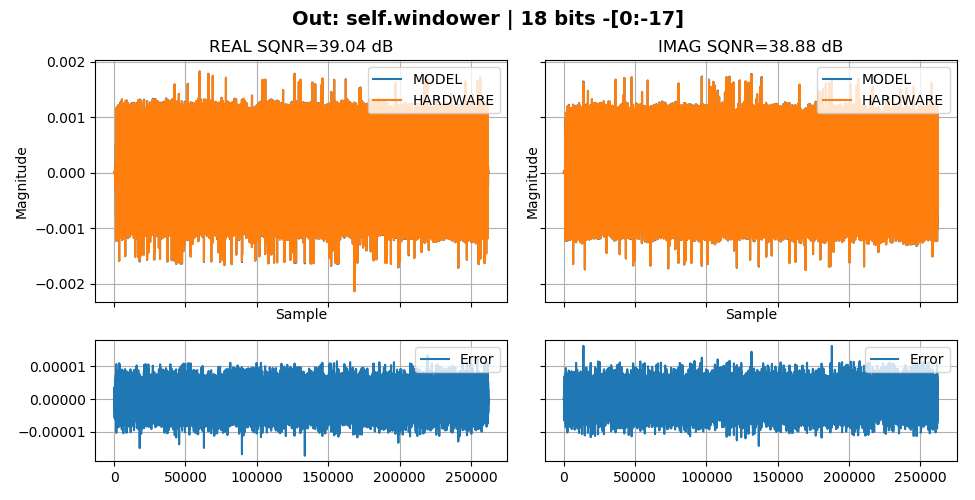

<IPython.core.display.Javascript object>


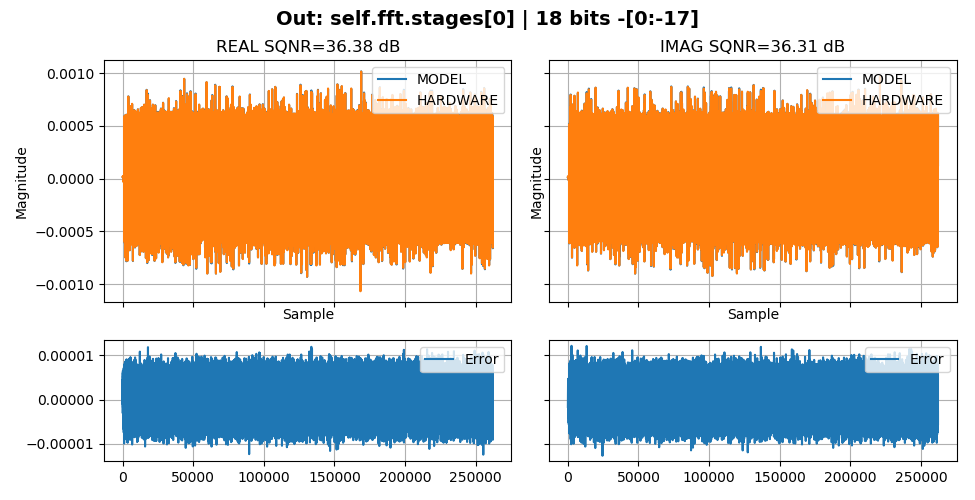

<IPython.core.display.Javascript object>


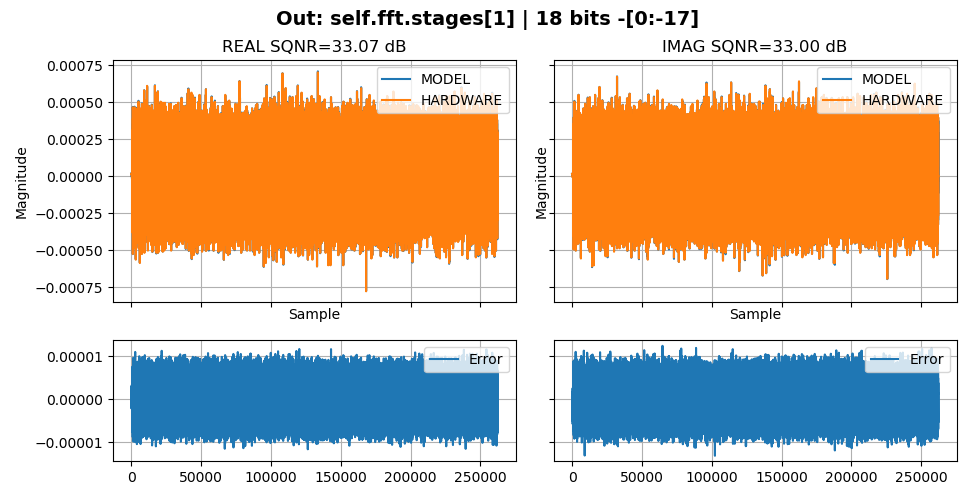

<IPython.core.display.Javascript object>


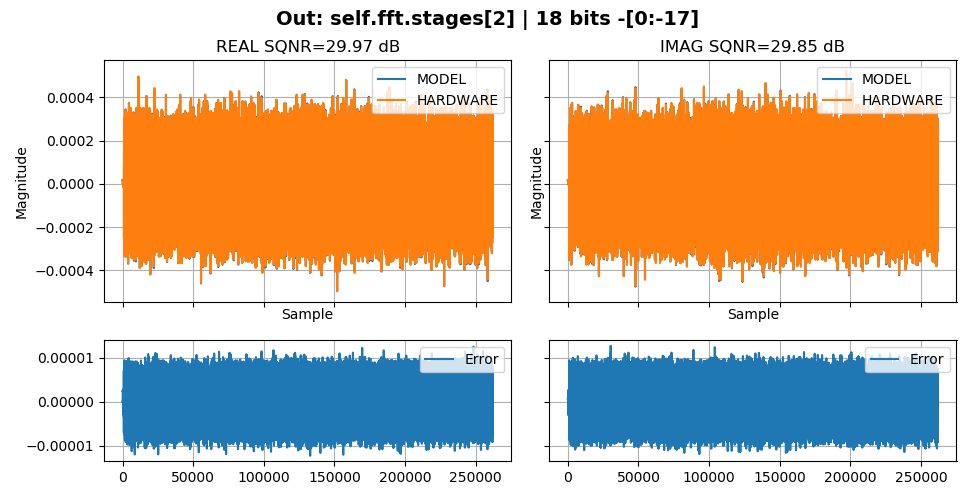

<IPython.core.display.Javascript object>


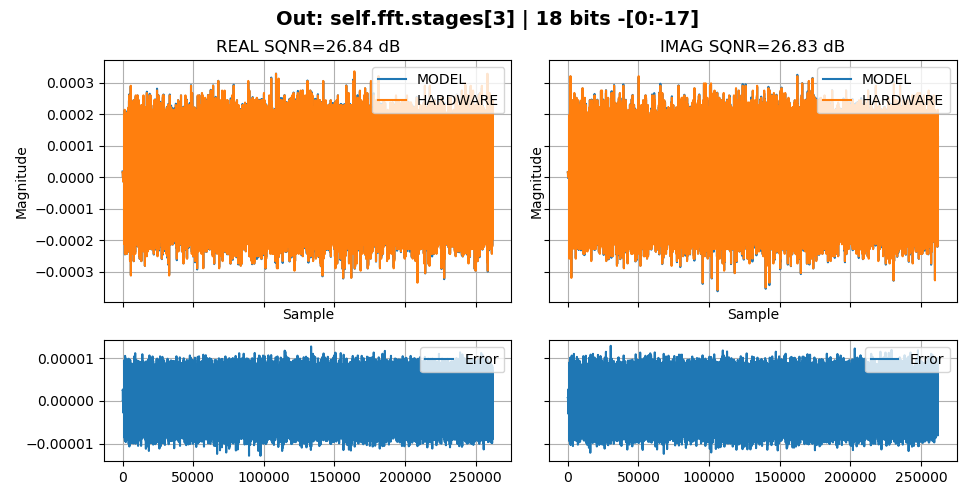

<IPython.core.display.Javascript object>


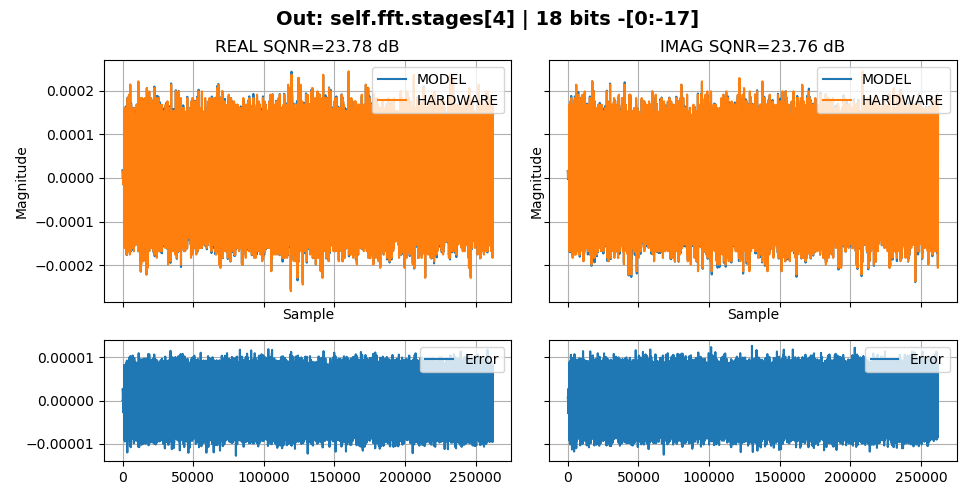

<IPython.core.display.Javascript object>


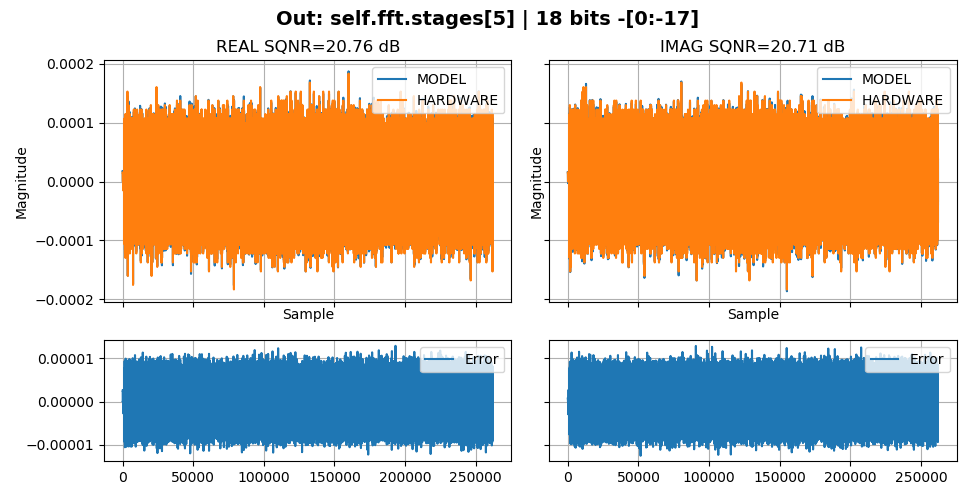

<IPython.core.display.Javascript object>


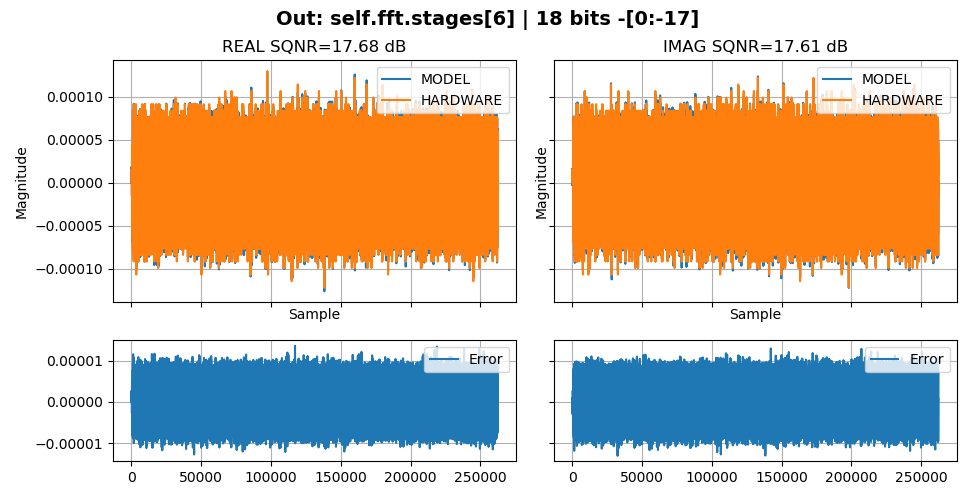

<IPython.core.display.Javascript object>


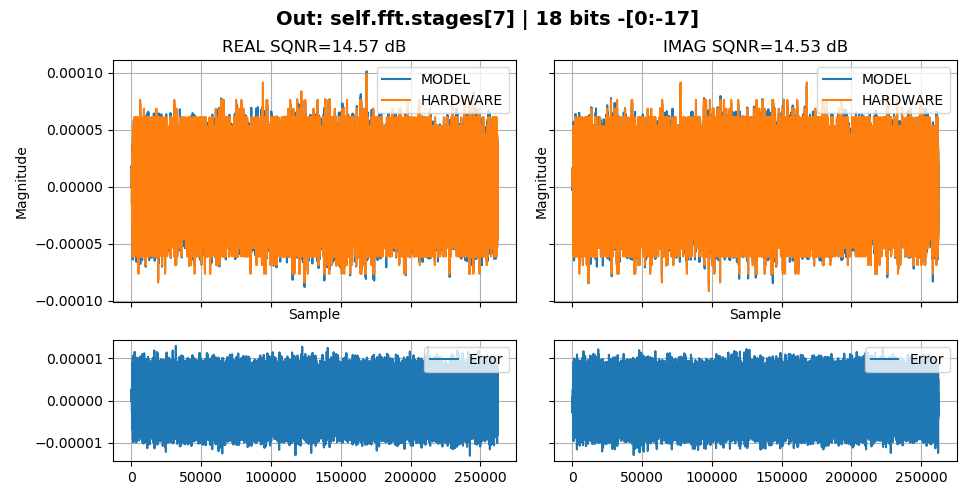

<IPython.core.display.Javascript object>


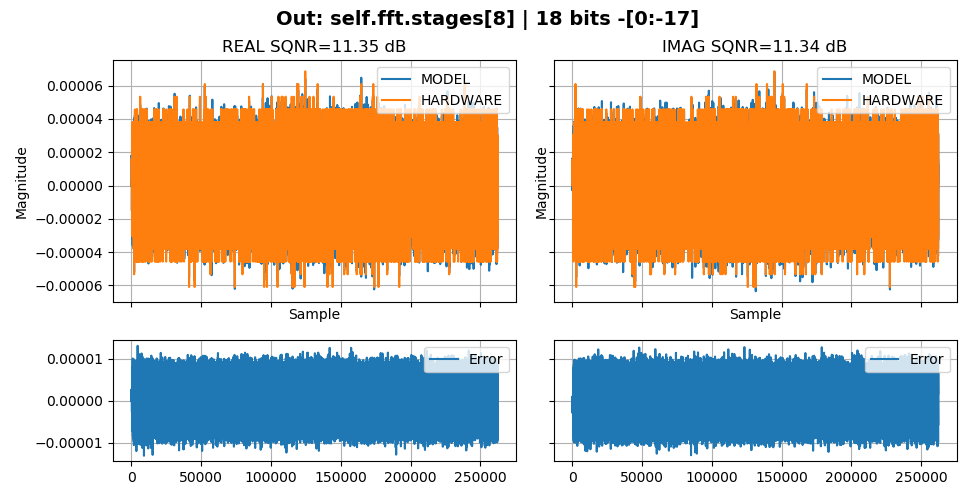

<IPython.core.display.Javascript object>


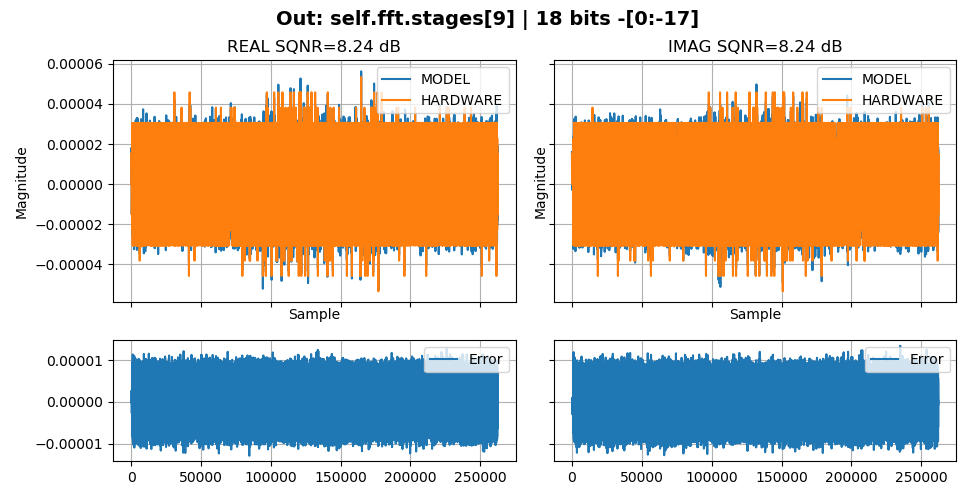

<IPython.core.display.Javascript object>


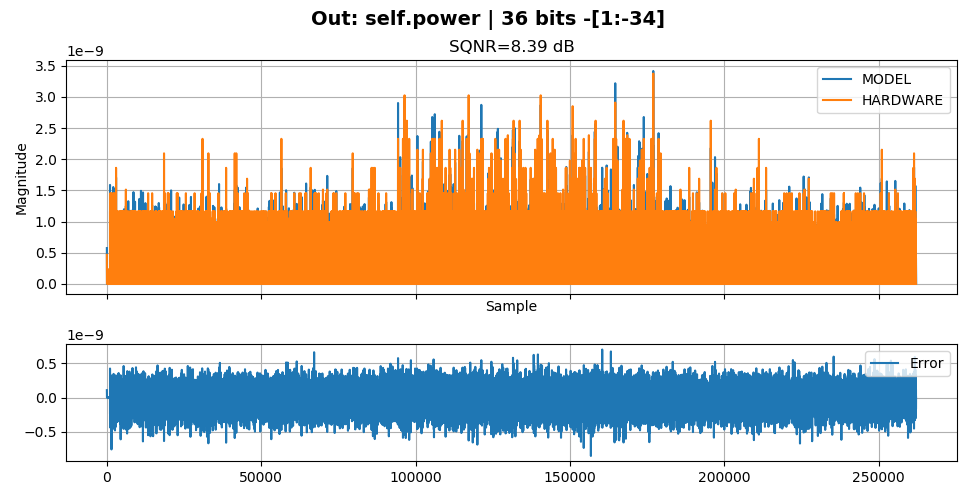

<IPython.core.display.Javascript object>


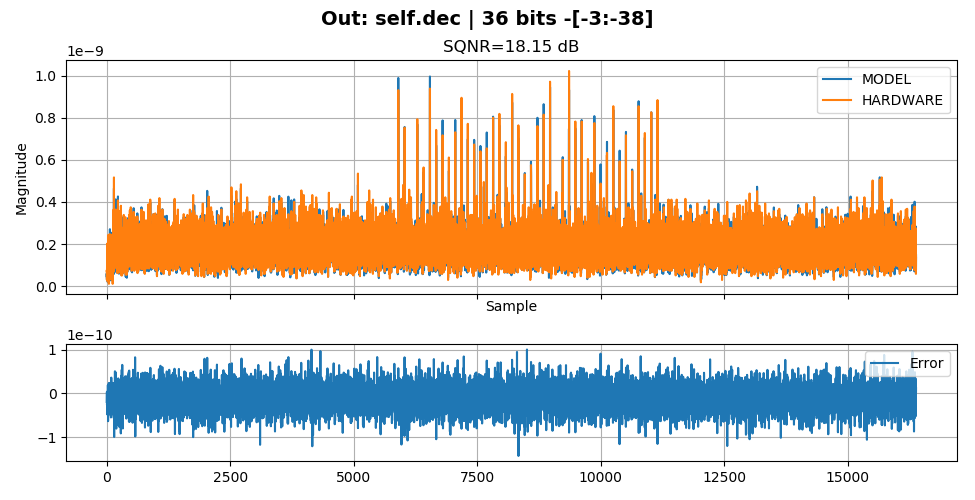

<IPython.core.display.Javascript object>


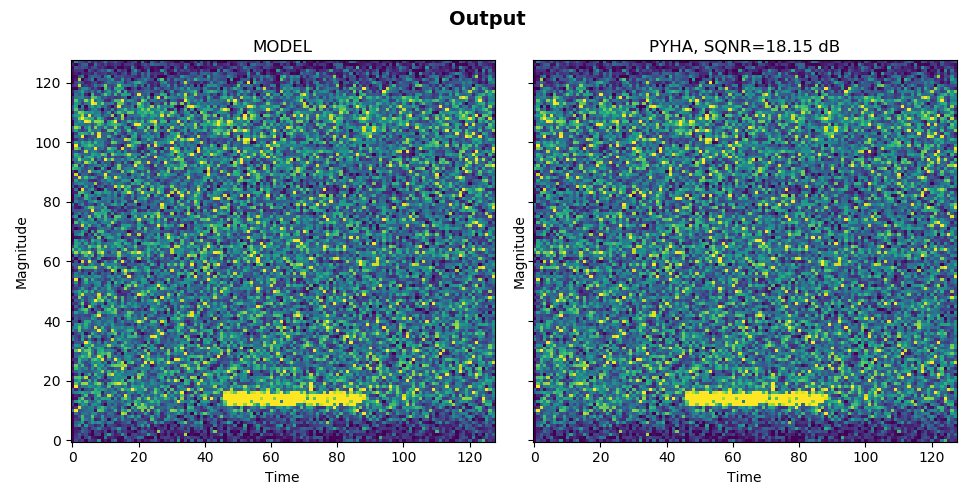

In [11]:
dut = Spectrogram(fft_size=1024, avg_freq_axis=8, avg_time_axis=2, fft_twiddle_bits=9, window_bits=8)
crop = dut.FFT_SIZE * dut.AVG_TIME_AXIS
input_signal = load_complex64_file(get_data_file('limem_ph3weak_40m')) # this has only a few bits of information...
input_signal = input_signal[:len(input_signal) // (crop) * (crop)]

sims = simulate(dut, input_signal, trace=True, pipeline_flush='auto')
plot_trace()
plot_imshow(sims, name='Output', rows=dut.FFT_SIZE // dut.AVG_FREQ_AXIS, transpose=True)

# Conversion to VHDL and RTL/NETLIST simulations

In [12]:
dut = Spectrogram(fft_size=1024, avg_freq_axis=8, avg_time_axis=2, fft_twiddle_bits=9, window_bits=8)
minimal_input = input_signal[:dut.FFT_SIZE * dut.AVG_TIME_AXIS]
sims = simulate(dut, minimal_input, pipeline_flush='auto', 
                simulations=['MODEL', 'HARDWARE', 'RTL', 'NETLIST'], 
                conversion_path='/tmp/pyha_output')
assert hardware_sims_equal(sims)

INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Simulaton needs to support conversion to VHDL -> major slowdown
INFO:sim:Running "HARDWARE" simulation...


100%|██████████| 2048/2048 [00:07<00:00, 265.66it/s]

INFO:sim:Flushing the pipeline to collect 128 valid samples (currently have 0)


INFO:sim:Flush took 1191 cycles.
INFO:sim:OK!
INFO:conversion:Creating top.vhd ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:MovingAverage to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DCRemoval to VHDL ...
INFO:conversion:Windower to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL 

# Synthesis:  resource usage and Fmax

In [13]:
quartus = get_simulator_quartus() # reuse the work that was done during the simulation
print(quartus.get_resource_usage('fit'))
print(quartus.get_fmax())

INFO:synth:Running quartus_fit quartus_project...
INFO:synth:Running quartus_sta -t script.tcl...


Family : Cyclone IV E
Device : EP4CE40F23C8
Timing Models : Final
Total logic elements : 4,967 / 39,600 ( 13 % )
    Total combinational functions : 4,697 / 39,600 ( 12 % )
    Dedicated logic registers : 2,312 / 39,600 ( 6 % )
Total registers : 2312
Total pins : 76 / 329 ( 23 % )
Total virtual pins : 0
Total memory bits : 118,908 / 1,161,216 ( 10 % )
Embedded Multiplier 9-bit elements : 80 / 232 ( 34 % )
Total PLLs : 0 / 4 ( 0 % )

+-------------------------------------------------+
; Fmax Summary                                    ;
+-----------+-----------------+------------+------+
; Fmax      ; Restricted Fmax ; Clock Name ; Note ;
+-----------+-----------------+------------+------+
; 87.26 MHz ; 87.26 MHz       ; clk        ;      ;
+-----------+-----------------+------------+------+
This panel reports FMAX for every clock in the design, regardless of the user-specified clock periods.  FMAX is only computed for paths where the source and destination registers or ports are driven 